### Package import

All needed packages are imported at the top

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import folium

### Data loading
The preprocessed data is loaded where the first column is used for index.

In [176]:
df = pd.read_csv(os.path.abspath('../data/Processed/Cities.csv'), index_col=0)

print(df.shape)
df.head()

(331, 81)


,City,cityID,clusterID,Typology,Country,Car_Modeshare_(%),Public_Transit_Modeshare_(%),Bicycle_Modeshare_(%),Walking_Modeshare_(%),Gasoline_Pump_Price_(USD/liter),...,BikeShare_Propensity_Factor,Development_Factor,Sustainability_Factor,Population_Factor,Congestion_Factor,Sprawl_Factor,Network_Density_Factor,Latitude,Longitude,Continent
284,Baltimore(MD),285,7,Auto Sprawl,United States,85.0,6.1,0.3,2.6,0.66,...,0.360637,0.796264,0.355964,0.081956,0.180085,0.722163,0.425187,39.290882,-76.610759,North America
9,Melbourne,10,8,Auto Innovative,Australia,80.0,14.0,2,4.0,1.11,...,0.363675,0.786174,0.397894,0.082267,0.333173,0.539355,0.558910,-37.814218,144.963161,Oceania
185,Niamey,186,1,Congested Emerging,Niger,NaN,9.0,2,60.0,1.02,...,0.343161,0.000000,0.273646,0.248398,0.655464,0.275605,0.410312,13.524834,2.109823,Africa
327,Hanoi,328,12,MetroBike Emerging,Vietnam,8.0,10.0,2,NaN,0.90,...,0.358868,0.157676,0.509057,0.292564,0.624623,0.666710,0.239113,21.029450,105.854444,Asia
66,Urumqi,67,12,MetroBike Emerging,China,21.7,54.7,NaN,NaN,1.16,...,0.392551,0.287235,0.801464,0.322960,0.586019,0.791822,0.075617,43.419754,87.319461,Asia


In [17]:
df.columns

Index(['City', 'cityID', 'clusterID', 'Typology', 'Country',
       'Car_Modeshare_(%)', 'Public_Transit_Modeshare_(%)',
       'Bicycle_Modeshare_(%)', 'Walking_Modeshare_(%)',
       'Gasoline_Pump_Price_(USD/liter)', 'Road_Deaths_Rate_(per_1000)',
       'Subway_Length_(km)', 'Subway_Length_Density_(per_km)',
       'Subway_Stations_per_Hundred_Thousand', 'Subway_Ridership_per_Capita',
       'Subway_Age_(years)', 'BRT_Length_(km)',
       'BRT_System_Length_Density_(per_km)',
       'BRT_Stations_per_Hundred_Thousand_Persons',
       'BRT_Fleet_per_Hundred_Thousand_Persons',
       'BRT_Annual_Ridership_per_Capita', 'BRT_Age_(years)',
       'Bikeshare_Stations', 'Bikeshare_Stations_per_Hundred_Thousand_Persons',
       'Bikeshare_Number_of_Bikes',
       'Bikeshare_Bicycles_per_Hundred_Thousand_Persons',
       'Bikeshare_Age_(years)', 'Congestion_(%)', 'Congestion_AM_Peak_(%)',
       'Congestion_PM_Peak_(%)', 'Traffic_Index', 'Travel_Time_Index',
       'Inefficiency_Index', 'Po

### Missing values

Missing values are very important to be aware of when it comes to data science. Based on the number of missing values some columns or rows can (or should) fully be removed. In other cases the missing values can be imputed. They can also be left untouched but it is important to remember then as not all algorithmns handle missing values. Missing values can also be considered as its own category is some cases. Before taking any decision the 

In [39]:
print(f"{len(df.loc[:,df.isna().sum()>0].isna().sum())}/{df.shape[1]} columns has at least one missing value. The number of missing values per column (that has missing value(s)) is:")
df.loc[:,df.isna().sum()>0].isna().sum()

48/80 columns has at least one missing value. The number of missing values per column (that has missing value(s)) is:


Car Modeshare (%)                                  107
Public Transit Modeshare (%)                       104
Bicycle Modeshare (%)                              146
Walking Modeshare (%)                              132
Road Deaths Rate (per 1000)                          1
BRT Length (km)                                      1
BRT System Length Density (per km)                   2
BRT Stations per Hundred Thousand Persons           10
BRT Fleet per Hundred Thousand Persons              31
BRT Annual Ridership per Capita                      1
BRT Age (years)                                     15
Bikeshare Stations                                   3
Bikeshare Stations per Hundred Thousand Persons      1
Bikeshare Number of Bikes                           18
Bikeshare Bicycles per Hundred Thousand Persons     15
Bikeshare Age (years)                                3
Congestion (%)                                     166
Congestion AM Peak (%)                             166
Congestion

Firstly it is noticed that there is no missing values in the column with `CO2 Emissions per Capita (metric tonnes)` which is the value that is going to be predicted.

The number of missing values looks structured to some degree. There is e.g. many columns that has 108 or 14 missing values. To investigate this structure further a binary plot based on na values is generated, which is shown below:

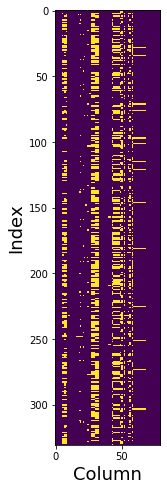

In [49]:
plt.figure(figsize = (20,8))
plt.imshow(df.isna())
plt.xlabel('Column', fontsize = 18)
plt.ylabel('Index', fontsize = 18)
plt.show()

From this it is clearly seen that there is structure to the missing values - as an example it is clear that it is the same 14 cities that has some missing values. This is definitely something to be aware of as these columns can not be used for prediction for these cities.

In [25]:
df.describe()

,cityID,clusterID,Car Modeshare (%),Public Transit Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),Subway Stations per Hundred Thousand,...,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor,Latitude,Longitude
count,331.000000,331.000000,224.000000,227.000000,199.000000,331.000000,330.000000,331.000000,331.000000,331.000000,...,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,166.000000,5.567976,47.688694,25.999218,18.270352,1.053988,14.707576,38.872356,0.037598,0.729446,...,0.173344,0.398780,0.416785,0.381920,0.171709,0.491645,0.492904,0.412400,26.234527,10.704624
std,95.695698,3.591750,28.588289,20.319709,15.845304,0.424823,8.718870,77.291871,0.068359,1.224042,...,0.148059,0.078614,0.266073,0.153003,0.159347,0.189305,0.227212,0.151951,21.783480,77.914851
min,1.000000,1.000000,0.000000,0.400000,0.000000,0.010000,0.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.814218,-157.855676
25%,83.500000,2.000000,22.475000,9.000000,3.200000,0.705000,7.500000,0.000000,0.000000,0.000000,...,0.078734,0.358541,0.213589,0.281133,0.055895,0.366844,0.309768,0.319600,14.657829,-71.989610
50%,166.000000,6.000000,43.000000,22.200000,16.000000,1.050000,13.950000,0.000000,0.000000,0.000000,...,0.139255,0.390862,0.341371,0.341087,0.120180,0.533182,0.473091,0.394053,32.080481,15.050276
75%,248.500000,8.000000,75.650000,39.650000,27.000000,1.315000,20.450000,42.550000,0.052714,1.137465,...,0.190673,0.423609,0.706330,0.450211,0.248221,0.640847,0.679550,0.474617,40.736174,74.084318
max,331.000000,12.000000,94.800000,82.500000,78.000000,2.120000,37.200000,588.000000,0.612982,9.797980,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,60.167410,174.763180


### Geographical placement

Let's get an overview of the location of the cities in the data set. Using the module `folium` a world map can be generated and all the cities can be added using the latitude and longitude that was added in the preprocessing. Notice that the name of a given city can be obtained by hovering the mouse over it.

In [70]:
coldict = {1:'#e6194B', 2:'#3cb44b', 3:'#ffe119', 4:'#4363d8', 5:'#f58231', 6:'#42d4f4', 7:'#f032e6', 8:'#fabed4', 9:'#469990', 10:'#dcbeff', 11:'#9A6324', 12:'#fffac8'}

def plot_points(map, latitude, longitude, col = 4, tooltip = None):
    for lat, lon, tt, c in zip(latitude, longitude, tooltip, col):
        folium.CircleMarker(location=[lat, lon],
                                tooltip = tt,
                                radius=1,
                                weight=4,
                                color = c).add_to(map)

m = folium.Map(prefer_canvas=True)
plot_points(m, df['Latitude'], df['Longitude'], [coldict[c] for c in df.clusterID], df['City'])
m

The cities seems to be spread fairly wide around the world with a lack of cities in the more Northern of Southern part of the world. The *densest* clusters of cities in the dataset are found in the Easter part of the US, Central Europa and Eastern part of Asia.

In [23]:
df[df.Country == "Nigeria"]

,City,cityID,clusterID,Typology,Country,Car_Modeshare_(%),Public_Transit_Modeshare_(%),Bicycle_Modeshare_(%),Walking_Modeshare_(%),Gasoline_Pump_Price_(USD/liter),...,BRT_Propensity_Factor,BikeShare_Propensity_Factor,Development_Factor,Sustainability_Factor,Population_Factor,Congestion_Factor,Sprawl_Factor,Network_Density_Factor,Latitude,Longitude
187,Kano,188,1,Congested Emerging,Nigeria,7.8,72.3,NaN,NaN,0.48,...,0.080005,0.351041,0.070801,0.309349,0.294307,0.731431,0.407621,0.360712,11.894839,8.536414
186,Lagos,187,3,Congested Boomer,Nigeria,15.0,72.0,1,12.0,0.48,...,0.223639,0.372404,0.098509,0.168189,0.674359,0.663095,0.506962,0.370038,6.455057,3.394179


In [28]:
df.Typology.value_counts()

Congested Emerging         59
Auto Sprawl                51
BusTransit Sprawl          47
MassTransit Moderate       30
MetroBike Emerging         27
Hybrid Giant               26
Hybrid Moderate            20
MassTransit Heavyweight    19
Congested Boomer           17
BusTransit Dense           16
Auto Innovative            14
MetroBike Giant             5
Name: Typology, dtype: int64

In [50]:
tmp = df[df.Typology == "MetroBike Giant"].isna().sum()
tmp[tmp > 0]

Bicycle_Modeshare_(%)           1
Traffic_Index                   3
Travel_Time_Index               3
Inefficiency_Index              3
Cost_of_Living_Index            1
Rent_Index                      1
Grocery_Index                   1
Restaurant_Price_Index          1
Local_Purchasing_Power_Index    1
Poverty_Rate_(%)                1
Safety_Index                    1
Pollution_Index_                1
dtype: int64

In [78]:
a= df[df.City == "Lagos"].clusterID.values[0]
a

3

In [86]:
city = "Lagos"

In [93]:
sub_df = df[df.clusterID == df[df.City == city].clusterID.values[0]].set_index('City')

In [100]:
sub_df.loc[city, ["Latitude", "Longitude"]].values-np.array([1,2])

array([5.4550575, 1.3941795], dtype=object)

In [106]:
sub_df.index

Index(['Pune', 'Delhi', 'Chittagong', 'Karachi', 'Bangalore', 'Lahore',
       'Mumbai', 'Chennai', 'Surat', 'Kinshasa', 'Luanda', 'Ahmedabad',
       'Hyderabad', 'Kolkata', 'Manila', 'Dhaka', 'Lagos'],
      dtype='object', name='City')

In [107]:
[np.linalg.norm(sub_df.loc[city, ["Latitude", "Longitude"]].values-sub_df.loc[c, ["Latitude", "Longitude"]])
for c in sub_df.index]

[71.48599578764133,
 77.09234574023762,
 89.86061370181385,
 66.47211932029923,
 74.48339435651096,
 75.23423658867193,
 70.5543567178042,
 77.17454874627468,
 70.95992179029238,
 16.068207927370413,
 18.181516254232253,
 71.14132629317041,
 75.8589722882709,
 86.47278290527466,
 117.86790024317547,
 88.732351722306,
 0.0]

In [109]:
sub_df['Dist'] = [np.linalg.norm(sub_df.loc[city, ["Latitude", "Longitude"]].values-sub_df.loc[c, ["Latitude", "Longitude"]]) for c in sub_df.index]
sub_df

,cityID,clusterID,Typology,Country,Car_Modeshare_(%),Public_Transit_Modeshare_(%),Bicycle_Modeshare_(%),Walking_Modeshare_(%),Gasoline_Pump_Price_(USD/liter),Road_Deaths_Rate_(per_1000),...,BikeShare_Propensity_Factor,Development_Factor,Sustainability_Factor,Population_Factor,Congestion_Factor,Sprawl_Factor,Network_Density_Factor,Latitude,Longitude,Dist
City,,,,,,,,,,,,,,,,,,,,,
Pune,120,3,Congested Boomer,India,54.0,12.0,11,22.0,1.19,5.2,...,0.458655,0.174894,0.230949,0.333745,0.483623,0.196003,0.309751,18.521428,73.854454,71.485996
Delhi,113,3,Congested Boomer,India,19.0,42.0,12,21.0,1.14,9.1,...,0.513839,0.180778,0.243233,1.000000,0.622991,0.416115,0.567405,28.651718,77.221939,77.092346
Chittagong,14,3,Congested Boomer,Bangladesh,NaN,NaN,NaN,NaN,1.06,13.6,...,0.381424,0.095132,0.288382,0.400922,0.571953,0.175642,0.196309,22.330800,91.841286,89.860614
Karachi,191,3,Congested Boomer,Pakistan,48.0,52.0,NaN,NaN,0.76,14.2,...,0.418875,0.064251,0.296024,0.688797,0.591594,0.329516,0.359365,25.144690,67.184777,66.472119
Bangalore,117,3,Congested Boomer,India,25.0,35.0,7,26.0,1.19,8.9,...,0.477260,0.164765,0.252967,0.478411,0.554087,0.278507,0.496363,12.979120,77.591300,74.483394
Lahore,192,3,Congested Boomer,Pakistan,24.0,16.0,NaN,NaN,0.76,14.2,...,0.409723,0.079106,0.305113,0.425779,0.544801,0.346230,0.435520,31.565682,74.314183,75.234237
Mumbai,114,3,Congested Boomer,India,15.0,45.0,6,27.0,1.27,3.2,...,0.448513,0.176602,0.215412,0.734119,0.660284,0.109147,0.312022,18.938771,72.835335,70.554357
Chennai,116,3,Congested Boomer,India,30.0,39.0,9,22.0,1.19,26.6,...,0.423938,0.105810,0.322149,0.421691,0.536566,0.396178,0.454866,13.080172,80.283833,77.174549
Surat,121,3,Congested Boomer,India,31.0,13.0,13,42.0,1.19,5.0,...,0.430888,0.119680,0.323197,0.363959,0.527658,0.102161,0.250678,21.186461,72.808128,70.959922


In [257]:
def KNN_imputer(df, k, Weighted = False):
    # Copy of df to return
    df_new = df.copy()

    for City in df.City:
        print(City)
        # Cluster of city
        sub_df = df[df.clusterID == df[df.City == City].clusterID.values[0]].set_index('City')

        # Add distance 
        sub_df['Dist'] = [np.linalg.norm(sub_df.loc[City, ["Latitude", "Longitude"]].values-sub_df.loc[c, ["Latitude", "Longitude"]]) for c in sub_df.index]

        # Get columns where data is missing
        missing = df[df.City == City].isna().squeeze()[df[df.City == City].isna().squeeze()].index

        for col in missing:
            if (~sub_df[col].isna()).sum() < k:
                continue
            
            knn = sub_df[[col, 'Dist']].dropna().nsmallest(k, 'Dist')

            if Weighted:
                # Change dist to weights 
                knn['Dist'] = (1/knn['Dist'])/((1/knn['Dist']).sum())
                imputed = (knn[col]*knn['Dist']).sum()
            else:
                imputed = knn[col].mean()

            df_new.loc[df_new['City'] == City, col] = imputed

    return df_new

In [205]:
City = 'Urumqi'
sub_df = df[df.clusterID == df[df.City == City].clusterID.values[0]].set_index('City')

# Add distance 
sub_df['Dist'] = [np.linalg.norm(sub_df.loc[City, ["Latitude", "Longitude"]].values-sub_df.loc[c, ["Latitude", "Longitude"]]) for c in sub_df.index]

# Get columns where data is missing
missing = df[df.City == City].isna().squeeze()[df[df.City == City].isna().squeeze()].index
col = 'Bicycle_Modeshare_(%)'

In [236]:
for i,j in zip(list(df.columns),list(df.dtypes)):
    print("ad")

ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad
ad


In [254]:
df['Bikeshare_Stations'] = pd.to_numeric(df['Bikeshare_Stations'], errors='coerce')
df['Bicycle_Modeshare_(%)'] = pd.to_numeric(df['Bicycle_Modeshare_(%)'], errors='coerce')


In [256]:
df['Bikeshare_Stations'].values

array([5.000e+01, 5.000e+01, 0.000e+00, 0.000e+00, 0.000e+00, 2.800e+01,
       1.229e+03, 0.000e+00, 3.400e+01, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 4.600e+01, 0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00,
       5.800e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 3.100e+01, 0.000e+00, 0.000e+00, 2.150e+02,
       0.000e+00, 0.000e+00, 0.000e+00, 2.900e+01, 0.000e+00,       nan,
       0.000e+00, 4.240e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       8.000e+01, 0.000e+00, 0.000e+00, 6.500e+01, 1.020e+02, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.560e+02, 0.000e+00, 3.000e+01, 0.000e+00, 0.000e+00, 0.000e+00,
       1.400e+02, 0.000e+00, 1.000e+01, 1.900e+01, 5.000e+01, 0.000e+00,
       0.000e+00, 0.000e+00, 8.300e+01, 5.500e+01, 0.000e+00, 1.300e+01,
       0.000e+00, 0.000e+00, 4.470e+02, 0.000e+00, 0.000e+00, 7.180e+02,
       0.000e+00, 4.000e+01,       nan, 3.500e+01, 

In [213]:
knn = sub_df[[col, 'Dist']].dropna().nsmallest(5, 'Dist')


'55.347.28237.63.2'

In [202]:
KNN_imputer(df, 3, Weighted = False)

Baltimore(MD)
Melbourne
Niamey
Hanoi
Urumqi


TypeError: Could not convert 55.347.282 to numeric

In [130]:
sub_df['Dist'] = [np.linalg.norm(sub_df.loc[city, ["Latitude", "Longitude"]].values-sub_df.loc[c, ["Latitude", "Longitude"]]) for c in sub_df.index]

In [131]:
sub_df[['Pollution_Index_', 'Dist']].dropna()

,Pollution_Index_,Dist
City,,
Pune,78.10,71.485996
Delhi,92.48,77.092346
Karachi,93.28,66.472119
Bangalore,83.16,74.483394
Lahore,74.53,75.234237
Mumbai,88.27,70.554357
Chennai,78.65,77.174549
Surat,62.08,70.959922
Ahmedabad,70.71,71.141326


In [170]:
df.where(f.City == "Lagos")

TypeError: 'method' object is not subscriptable

In [159]:
knn = sub_df[['Pollution_Index_', 'Dist']].dropna().nsmallest(5, 'Dist')
knn['Dist'] = (1/knn['Dist'])/((1/knn['Dist']).sum())
knn

,Pollution_Index_,Dist
City,,
Karachi,93.28,0.210831
Mumbai,88.27,0.198633
Surat,62.08,0.197498
Ahmedabad,70.71,0.196994
Pune,78.10,0.196044


In [183]:
City

NameError: name 'City' is not defined

In [174]:
df.loc[df['City'] == "Lagos", 'Pollution_Index_'] = 

In [177]:
df.loc[df['City'] == "Lagos", 'Pollution_Index_']

186   NaN
Name: Pollution_Index_, dtype: float64